# Compare with baseline

Our choice of GPR with wd kernel with shift
Baseline: GPR with RBF, onehot.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import defaultdict
import math
import json
import xarray as xr

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import PairwiseKernel, DotProduct, RBF 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import KFold

from codes.embedding import Embedding
from codes.environment import Rewards_env
from codes.ucb import GPUCB, Random
from codes.evaluations import evaluate, plot_eva
from codes.regression import *
from codes.kernels_for_GPK import *

import pickle
import xarray

from ipywidgets import IntProgress
from IPython.display import display
import warnings
%matplotlib inline

No default features for kernel instance. Please specify features.


In [2]:
# Path = '../../data/firstRound_Microplate_normTrue_formatSeq_logTrue.csv'
Path = '../../data/Results_Microplate_partialFalse_normTrue_plateRep_formatSeq_logTrue.csv'

df = pd.read_csv(Path)
df

Unnamed: 0         Name        Group        Plate                   RBS  \
0             0   RBS_1by1_0    reference  First_Plate  TTTAAGAAGGAGATATACAT   
1             1   RBS_1by1_1  bps_noncore  First_Plate  CTTAAGAAGGAGATATACAT   
2             2   RBS_1by1_2  bps_noncore  First_Plate  GTTAAGAAGGAGATATACAT   
3             3   RBS_1by1_3  bps_noncore  First_Plate  ATTAAGAAGGAGATATACAT   
4             4   RBS_1by1_4  bps_noncore  First_Plate  TCTAAGAAGGAGATATACAT   
..          ...          ...          ...          ...                   ...   
261         261  RBS_BA_1658      bandit2  Third_Plate  TTTAAGAGCTAAGTATACAT   
262         262  RBS_BA_1548      bandit2  Third_Plate  TTTAAGAGCGGAGTATACAT   
263         263  RBS_BA_2887      bandit2  Third_Plate  TTTAAGACTCTACTATACAT   
264         264  RBS_BA_3330      bandit2  Third_Plate  TTTAAGATGGTTATATACAT   
265         265   RBS_1by1_0    reference  Third_Plate  TTTAAGAAGGAGATATACAT   

       RBS6      Rep1      Rep2      Rep3      Rep4      Rep5      Rep6  \
0    AGGAGA  2.041126  2.180430  2.008687  2.651855  2.696232  1.759734   
1    AGGAGA  1.266224  1.401483  1.487751  1.504470  2.117809  1.479173   
2    AGGAGA  0.424247  0.569569  0.696390  0.191885  0.386420  0.371286   
3    AGGAGA  1.356465  1.603619  1.273798  1.275503  1.576387  0.834058   
4    AGGAGA  1.257113  1.785349  1.133755  1.654263  1.602915  1.645725   
..      ...       ...       ...       ...       ...       ...       ...   
261  GCTAAG  0.683225  0.300802  0.705886       NaN       NaN       NaN   
262  GCGGAG  2.422021  2.171638  1.850598       NaN       NaN       NaN   
263  CTCTAC  0.444056  0.390587  0.054900       NaN       NaN       NaN   
264  TGGTTA  0.645506  0.623099  0.627540       NaN       NaN       NaN   
265  AGGAGA       NaN  2.954113  3.685449       NaN       NaN       NaN   

      AVERAGE       STD  Pred Mean  Pred Std  Pred UCB  
0    2.223011  0.375047        NaN       NaN       NaN  
1    1.542818  0.295177        NaN       NaN       NaN  
2    0.439966  0.174313        NaN       NaN       NaN  
3    1.319972  0.278481        NaN       NaN       NaN  
4    1.513187  0.256567        NaN       NaN       NaN  
..        ...       ...        ...       ...       ...  
261  0.563304  0.227616   0.677239  0.634139  1.945517  
262  2.148085  0.286438   0.789158  0.576882  1.942922  
263  0.296515  0.210945   0.813209  0.564510  1.942230  
264  0.632049  0.011864   0.706033  0.617109  1.940251  
265  3.319781  0.517133        NaN       NaN       NaN  

[266 rows x 17 columns]

In [3]:
run_kfold = False

if run_kfold:

    kernel = 'WD_Kernel_Shift'
    eva_metric = [mean_squared_error, r2_score]

    gpr = GPR_Predictor(df, kernel_name = kernel)

    num_split = 5
    num_repeat = 10
    s_list = [1]
    # alpha_list = [0.5]
    alpha_list= [2] 
    # alpha_list= [0.01, 0.05, 0.1, 0.5].append(list(range(1,15)))
    l_list = [6]

    result_DataArray_wd = gpr.Repeated_kfold(num_split=num_split, num_repeat=num_repeat, alpha_list= alpha_list,
                                          l_list = l_list, s_list = s_list)
    
    print(result_DataArray_wd[1].mean(axis = -1).mean(axis=-1))

In [4]:
if run_kfold:

    kernel = 'RBF'
    eva_metric = [mean_squared_error, r2_score]

    gpr = GPR_Predictor(df, embedding = 'onehot', kernel_name = kernel)

    num_split = 5
    num_repeat = 10
    s_list = [1]
    # alpha_list = [0.5]
    alpha_list= [2] 
    # alpha_list= [0.01, 0.05, 0.1, 0.5].append(list(range(1,15)))
    l_list = [6]

    result_DataArray_rbf = gpr.Repeated_kfold(num_split=num_split, num_repeat=num_repeat, alpha_list= alpha_list,
                                          l_list = l_list, s_list = s_list)
    
    print(result_DataArray_rbf[0].mean(axis = -1).mean(axis=-1))

X train shape:  (1061, 20)
X test shape:  (89, 20)
create kernel instance
USE non-normalised kernel!
init kernel
finish creating kernel instance
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fa0ecef06a8>
Train:  0.33924539239371837
Test:  0.9062546298619567
<function r2_score at 0x7fa0ecef08c8>
Train:  0.6092069183197493
Test:  0.03610851138276738


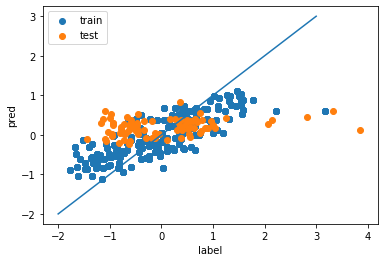

In [5]:
kernel = 'WD_Kernel_Shift'
embedding = 'label'
eva_metric = [mean_squared_error, r2_score]

# train and test on round 0
# gpr_train_samples = GPR_Predictor(df[df['Plate'] != 'Third_Plate'], kernel_name = kernel, embedding = embedding, eva_metric = eva_metric, l = 6, s = 1, alpha = 2, eva_on='seqs')

# train on round 0 (plate 1 and 2) and test on round 1 (plate 3)
gpr_train_samples = GPR_Predictor(df, train_idx= df['Plate'] != 'Third_Plate', test_idx= df['Plate'] == 'Third_Plate', 
                   kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
                   l = 6, s = 1, alpha = 2, eva_on='seqs')
gpr_train_samples.regression()
gpr_train_samples.scatter_plot()

### Projection to first eigenvector

In [6]:
kernel_all = gpr_train_samples.wd_kernel_instance.kernel_all_normalised
first_eign_vector = np.linalg.eigh(kernel_all)[1][-1]
proj = kernel_all.T.dot(first_eign_vector)

pred_all = list(gpr_train_samples.train_df['pred mean'])+  list(gpr_train_samples.test_df['pred mean'])
label_all = list(gpr_train_samples.train_df['AVERAGE'])+  list(gpr_train_samples.test_df['AVERAGE'])

Text(0, 0.5, 'average label')

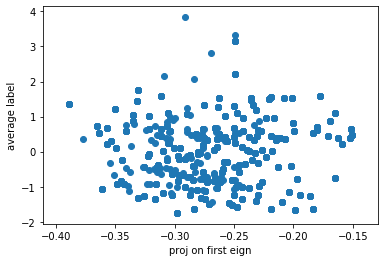

In [7]:
plt.scatter(proj, label_all)
plt.xlabel('proj on first eign')
plt.ylabel('average label')

X train shape:  (1078, 80)
X test shape:  (53, 80)
gp_reg fit
gp_reg pred
finish reg
<function mean_squared_error at 0x7fa0ecef06a8>
Train:  0.14882615448748357
Test:  0.5157931418715052
<function r2_score at 0x7fa0ecef08c8>
Train:  0.8336403874356897
Test:  0.3064016493510521


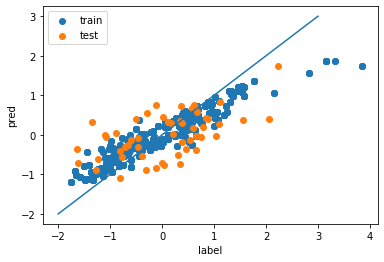

In [8]:
kernel = 'RBF'
embedding = 'onehot'
eva_metric = [mean_squared_error, r2_score]

gpr_train_samples = GPR_Predictor(df, kernel_name = kernel, embedding = embedding, eva_metric = eva_metric,
                   alpha = 2, eva_on='seqs')
gpr_train_samples.regression()
gpr_train_samples.scatter_plot()

In [9]:
gpr_train_samples.gp_reg.kernel_

RBF(length_scale=0.621)